In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("fraud.csv", )

In [2]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [3]:
df['balance_error_orig'] = df['oldbalanceOrg']-df['amount']-df['newbalanceOrig']
df['balance_error_dest'] = df['oldbalanceDest']+df['amount']-df['newbalanceDest']

In [4]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_error_orig,balance_error_dest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,0.000000e+00,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,0.000000e+00,1864.28
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,0.000000e+00,181.00
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,0.000000e+00,21363.00
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,0.000000e+00,11668.14
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,0.000000e+00,7817.71
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,0.000000e+00,7107.77
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,0.000000e+00,7861.64
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,-1.353360e+03,4024.36
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,-7.275958e-12,6886.98


In [5]:
pmt = df.loc[df['type'] == 'PAYMENT']
cout = df.loc[df['type'] == 'CASH_OUT']
cin = df.loc[df['type'] == 'CASH_IN']
dbt = df.loc[df['type'] == 'DEBIT']
trans = df.loc[df['type'] == 'TRANSFER']

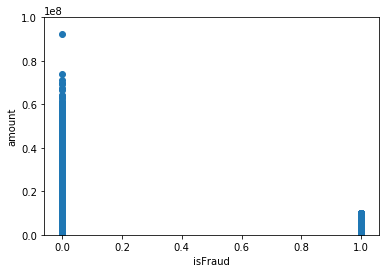

In [6]:
t_amount = trans['amount']
t_isFraud = trans['isFraud']
plt.scatter(t_isFraud,t_amount)
plt.xlabel("isFraud")
plt.ylabel("amount")
plt.ylim([0,100000000])
plt.show()

In [7]:
trans1 = trans.loc[trans['isFraud'] == 1]
trans0 = trans.loc[trans['isFraud'] == 0]

trans11 = trans1[['amount','balance_error_orig','balance_error_dest']]
trans00 = trans0[['amount','balance_error_orig','balance_error_dest']]

trans11.columns = ['amount_1','balance_error_orig_1','balance_error_dest_1']
trans00.columns = ['amount_0','balance_error_orig_0','balance_error_dest_0']

In [8]:
trans11.head(5)

,amount_1,balance_error_orig_1,balance_error_dest_1
2,181.00,0.0,181.00
251,2806.00,0.0,2806.00
680,20128.00,0.0,20128.00
969,1277212.77,0.0,1277212.77
1115,35063.63,0.0,35063.63


In [9]:
trans00.head(5)

,amount_0,balance_error_orig_0,balance_error_dest_0
19,215310.30,-2.146053e+05,237735.30
24,311685.89,-3.008509e+05,-2401220.00
58,62610.80,-3.637979e-12,54744.51
78,42712.39,-3.234900e+04,76569.87
79,77957.68,-7.795768e+04,150624.03


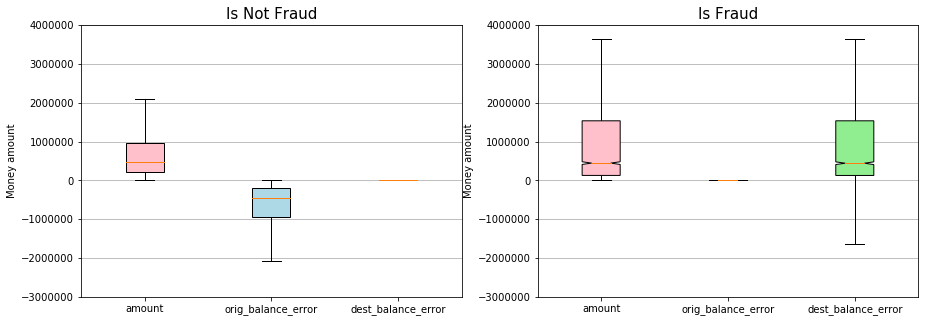

In [10]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_ylabel('Money amount') 
    ax.set_ylim([-3000000,4000000])
bplot1=axes[0].boxplot(trans00.values,vert=True,patch_artist=True,showfliers=False)
axes[0].set_title("Is Not Fraud",fontsize=15)

bplot2 = axes[1].boxplot(trans11.values,notch=True,vert=True,patch_artist=True,showfliers=False)
axes[1].set_title("Is Fraud",fontsize=15)

colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
plt.setp(axes, xticks=[1,2,3],xticklabels=['amount','orig_balance_error', 'dest_balance_error'])

        
plt.show()

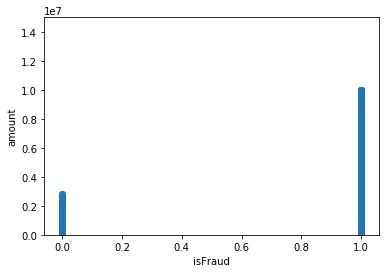

In [11]:
cout_amount = cout['amount']
cout_isFraud = cout['isFraud']
plt.scatter(cout_isFraud,cout_amount)
plt.xlabel("isFraud")
plt.ylabel("amount")
plt.ylim([0,15000000])
plt.show()

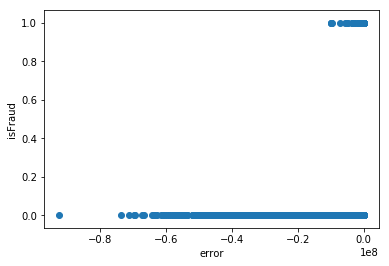

In [12]:
plt.scatter(trans['balance_error_orig'],trans['isFraud'])
plt.xlabel("error")
plt.ylabel("isFraud")

plt.show()

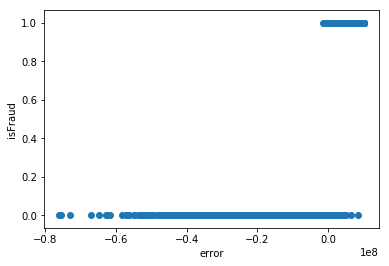

In [13]:
plt.scatter(trans['balance_error_dest'],trans['isFraud'])
plt.xlabel("error")
plt.ylabel("isFraud")

plt.show()

In [14]:
df.drop('nameOrig',axis=1,inplace=True)
df.drop('nameDest',axis=1,inplace=True)
df.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_error_orig,balance_error_dest
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0,0,0.000000e+00,9839.64
1,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0,0,0.000000e+00,1864.28
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,1,0,0.000000e+00,181.00
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1,0,0.000000e+00,21363.00
4,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0,0,0.000000e+00,11668.14
5,1,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0,0,0.000000e+00,7817.71
6,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0,0,0.000000e+00,7107.77
7,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0,0,0.000000e+00,7861.64
8,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0,0,-1.353360e+03,4024.36
9,1,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0,0,-7.275958e-12,6886.98


In [15]:
df.head(1)
type_mapping ={'CASH_OUT':1,'TRANSFER':2,'PAYMENT':3,'DEBIT':4,'CASH_IN':5}
df['type']=df['type'].map(type_mapping)
df.head(2)
#filter the transfer and cashout data
procdata = df.loc[df['type'].isin([1,2])]
procdata.head(5)
target = procdata['isFraud']
procdata=procdata.drop('isFraud',axis=1)
procdata.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,balance_error_orig,balance_error_dest
2,1,2,181.00,181.00,0.0,0.0,0.00,0,0.000000e+00,181.00
3,1,1,181.00,181.00,0.0,21182.0,0.00,0,0.000000e+00,21363.00
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0,-2.138089e+05,182703.50
19,1,2,215310.30,705.00,0.0,22425.0,0.00,0,-2.146053e+05,237735.30
24,1,2,311685.89,10835.00,0.0,6267.0,2719172.89,0,-3.008509e+05,-2401220.00
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0,-8.356930e+04,396799.55
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0,-5.501188e+04,63100.72
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0,-5.346890e+03,-5795447.02
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0,-2.849770e+03,49003.30
58,1,2,62610.80,79114.00,16503.2,517.0,8383.29,0,-3.637979e-12,54744.51


In [16]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(procdata,target, test_size=0.2)

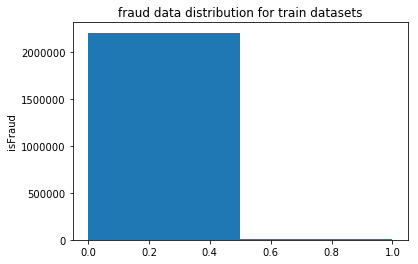

In [17]:
import matplotlib.pyplot as plt

plt.hist(y_train, bins=2)
plt.ylabel('isFraud')
plt.title('fraud data distribution for train datasets')
plt.show()


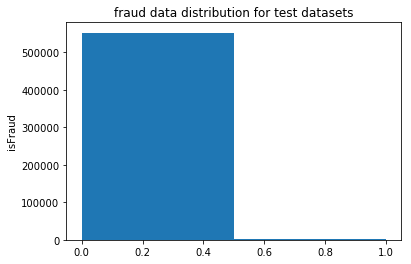

In [18]:
plt.hist(y_test, bins=2)
plt.ylabel('isFraud')
plt.title('fraud data distribution for test datasets')
plt.show()

In [19]:
#bayes_classification
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
used_features =[
    "type",
    "amount",
    "oldbalanceOrg",
    "newbalanceOrig",
    "oldbalanceDest",
    "newbalanceDest",
    "isFlaggedFraud",
    "balance_error_orig",
    "balance_error_dest"
]
#train classifier
gnb.fit(
    X_train[used_features].values,
    y_train.values
)
y_pred = gnb.predict(X_test[used_features])

print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (y_test != y_pred).sum(),
          100*(1-(y_test!= y_pred).sum()/X_test.shape[0])
))
mean_fraud=np.mean(y_test)
mean_not_fraud=1-mean_fraud
print("fraud prob = {:03.2f}%, Not fraud prob = {:03.2f}%"
      .format(100*mean_fraud,100*mean_not_fraud))
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Number of mislabeled points out of a total 554082 points : 7224, performance 98.70%
fraud prob = 0.30%, Not fraud prob = 99.70%
Accuracy: 0.986962218589


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels


def drawConfusionMatrix(y_true, y_pred, 
                          normalize=False,
                          title=None):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest')
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax    

In [21]:
drawConfusionMatrix(y_test, y_pred, normalize=True,title=None)

Normalized confusion matrix
[[ 0.98874403  0.01125597]
 [ 0.60456731  0.39543269]]


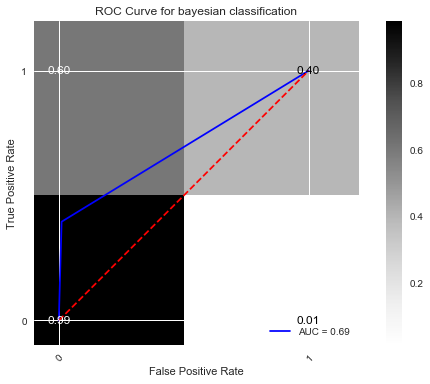

In [22]:
# draw ROC Curve

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('ROC Curve for bayesian classification')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [23]:
#logical regression
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [29]:
#Confusion_Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[551656    762]
 [   955    709]]


In [30]:
#The result is telling us that we have 551656+709 correct predictions and 762+955 incorrect predictions.

In [32]:
#Compute precision, recall, F-measure and support

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00    552418
          1       0.48      0.43      0.45      1664

avg / total       1.00      1.00      1.00    554082



/anaconda/lib/python3.6/site-packages/sklearn/linear_model/base.py:352: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


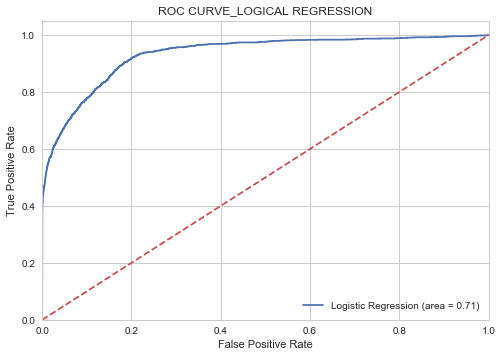

In [34]:
#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE_LOGICAL REGRESSION')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
